<a href="https://colab.research.google.com/github/senpro83/datascience_google_collab_projects/blob/main/Project_Submission_Full_Code_Version_Customer_Personality_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [7]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/Customer_Personality_Segmentation.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [9]:
# Write your code here.
print("Data types of all columns:")
print(data.dtypes)
print("\n" + "="*50 + "\n")
print("Detailed information about the dataframe:")
data.info()


Data types of all columns:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


Detailed information about the dataframe:
<class 'pandas.c

##### **Observations:**

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [10]:
# Write your code here
# Statistical summary of the data
print("Statistical Summary of the Data:")
print("="*80)
print(data.describe())
print("\n" + "="*80)

# Average household income
avg_income = data['Income'].mean()
print(f"\nAverage Household Income: ${avg_income:,.2f}")

Statistical Summary of the Data:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.0

##### **Observations:**

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [11]:
# Write your code here
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##### **Observations:**

#### **Question 4**: Are there any duplicates in the data?

In [12]:
# Write your code here
data.duplicated().sum()

np.int64(0)

##### **Observations:**

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

#### PLotting the histogram of each column.

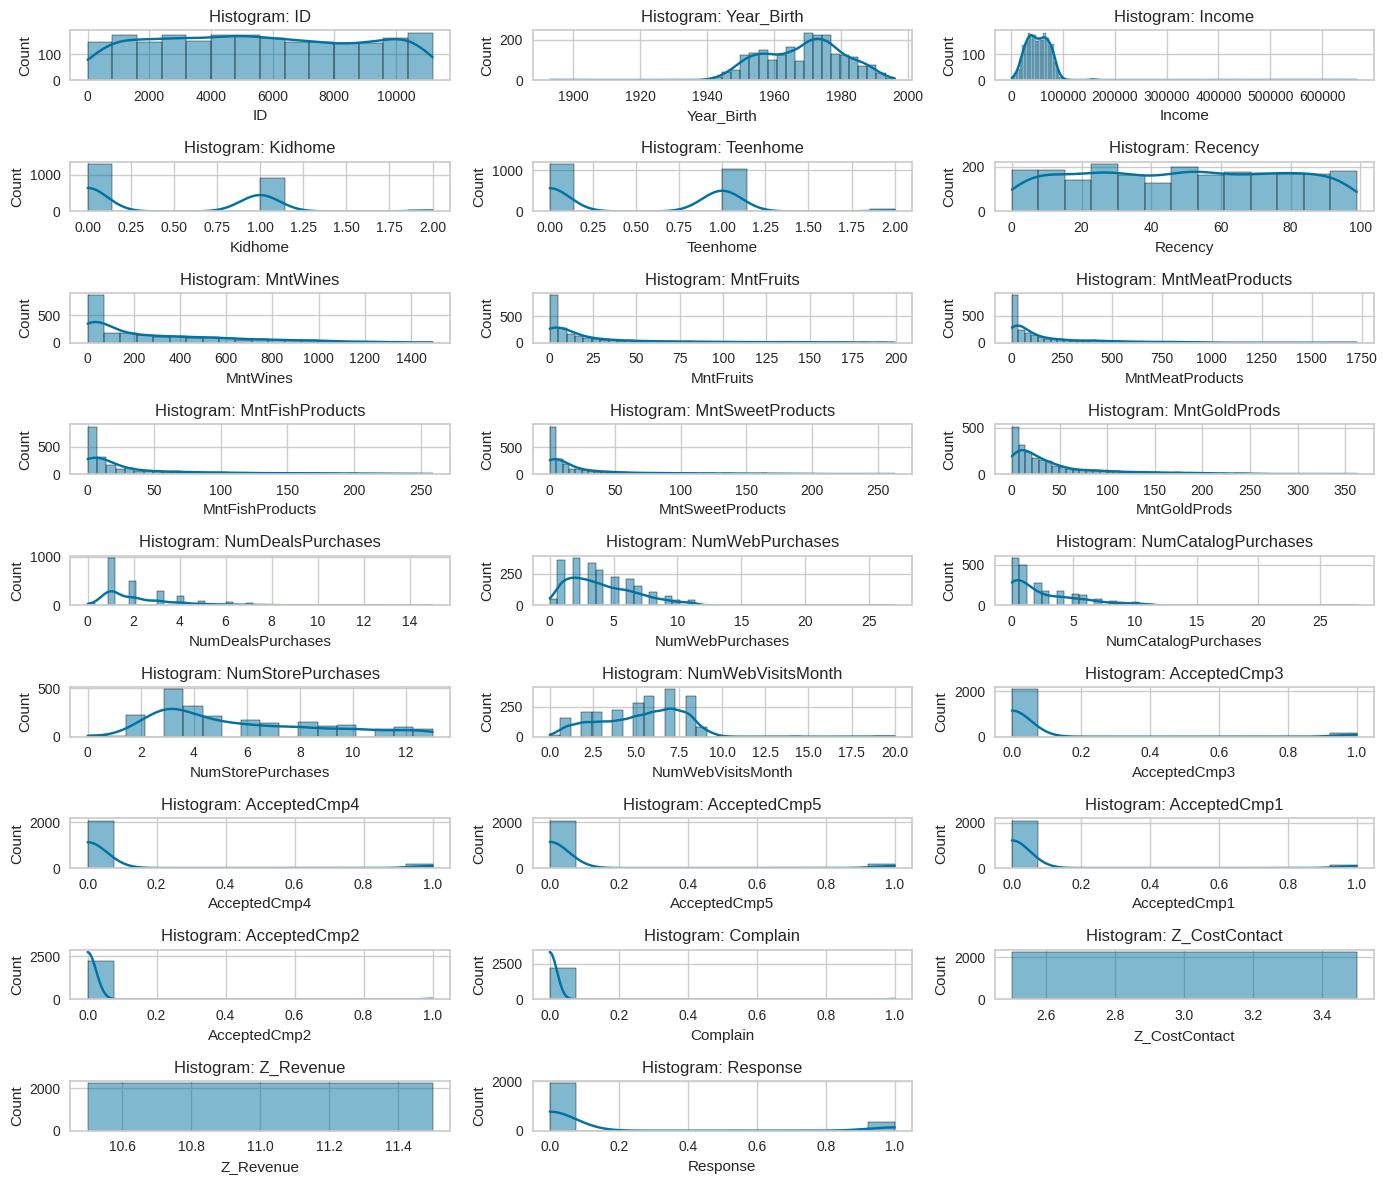

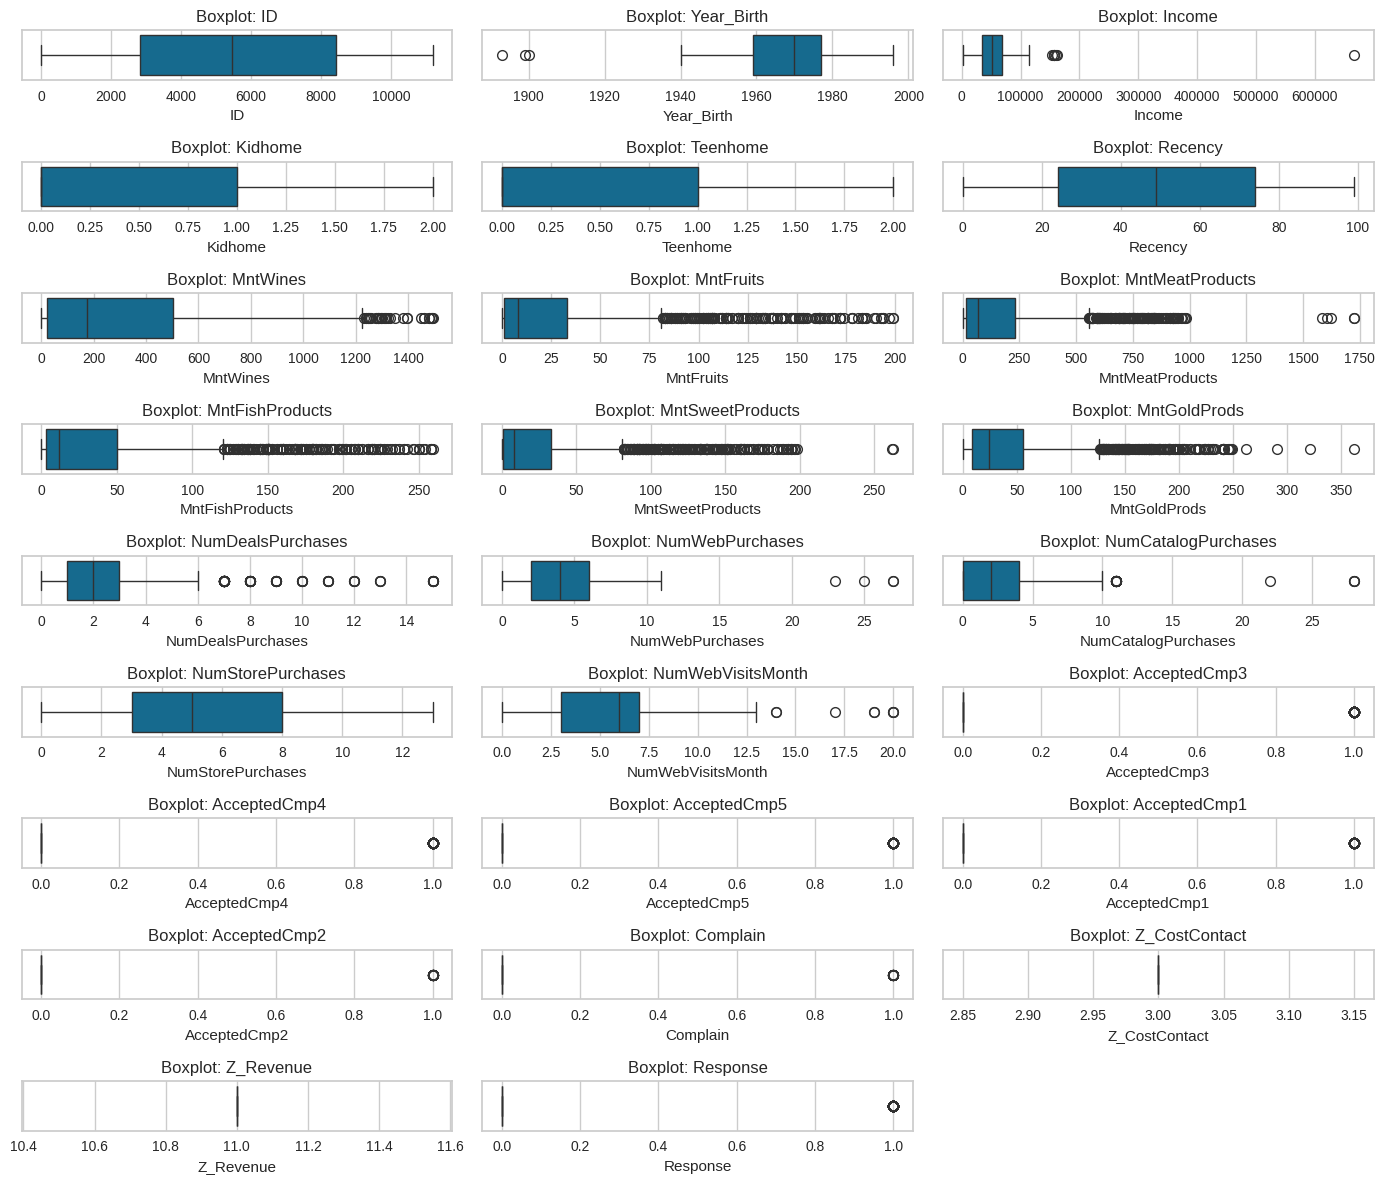

In [13]:
# Write your code here
# Select only numeric columns for plotting
numeric_columns = data.select_dtypes(include=["number"]).columns

# Histograms
plt.figure(figsize=(14, 12))
for i, feature in enumerate(numeric_columns, start=1):
    plt.subplot((len(numeric_columns) // 3) + 1, 3, i)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f"Histogram: {feature}")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14, 12))
for i, feature in enumerate(numeric_columns, start=1):
    plt.subplot((len(numeric_columns) // 3) + 1, 3, i)
    sns.boxplot(data=data, x=feature)
    plt.title(f"Boxplot: {feature}")
plt.tight_layout()
plt.show()

##### **Observations:**

Spending variables (MntWines/Fruits/Meat/Fish/Sweet/Gold): right‑skewed with many low spenders and a few high outliers.
Purchase counts (NumWeb/Catalog/Store): right‑skewed; most customers make few purchases; clear outliers.
Recency: often moderately right‑skewed; some very recent customers, tail of inactive ones.
NumWebVisitsMonth: right‑skewed; many low-visit customers, a tail with frequent visitors.
Income: right‑skewed with a long tail; visible outliers; missing values present (needs imputation).
Kidhome/Teenhome: discrete with mass at 0–1; very few higher counts; minimal spread.
Accepted campaign flags (AcceptedCmp1–5, Response): heavily zero‑inflated; very sparse positives.
Outliers: pronounced in monetary and count features; boxplots show many points beyond upper whiskers.
Scaling: distributions and outliers suggest using robust scaling (e.g., StandardScaler after winsorizing or RobustScaler) before K‑Means.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

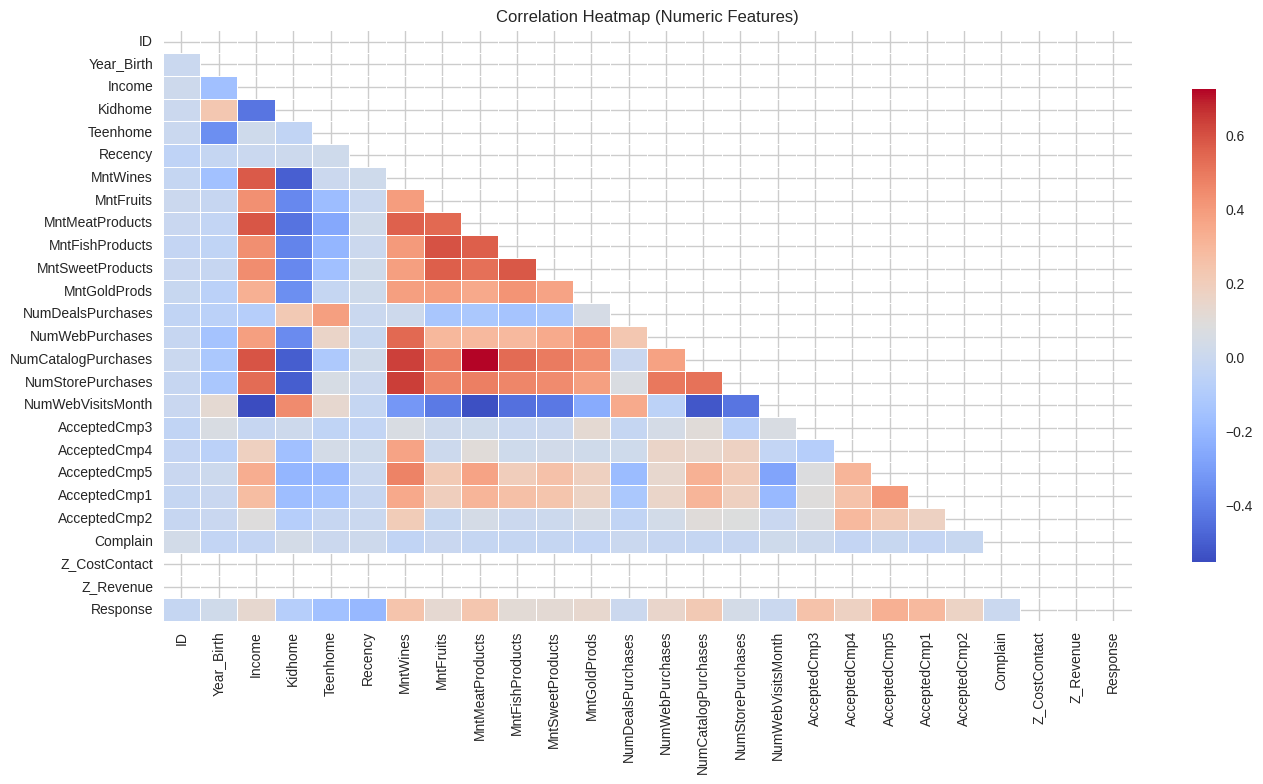

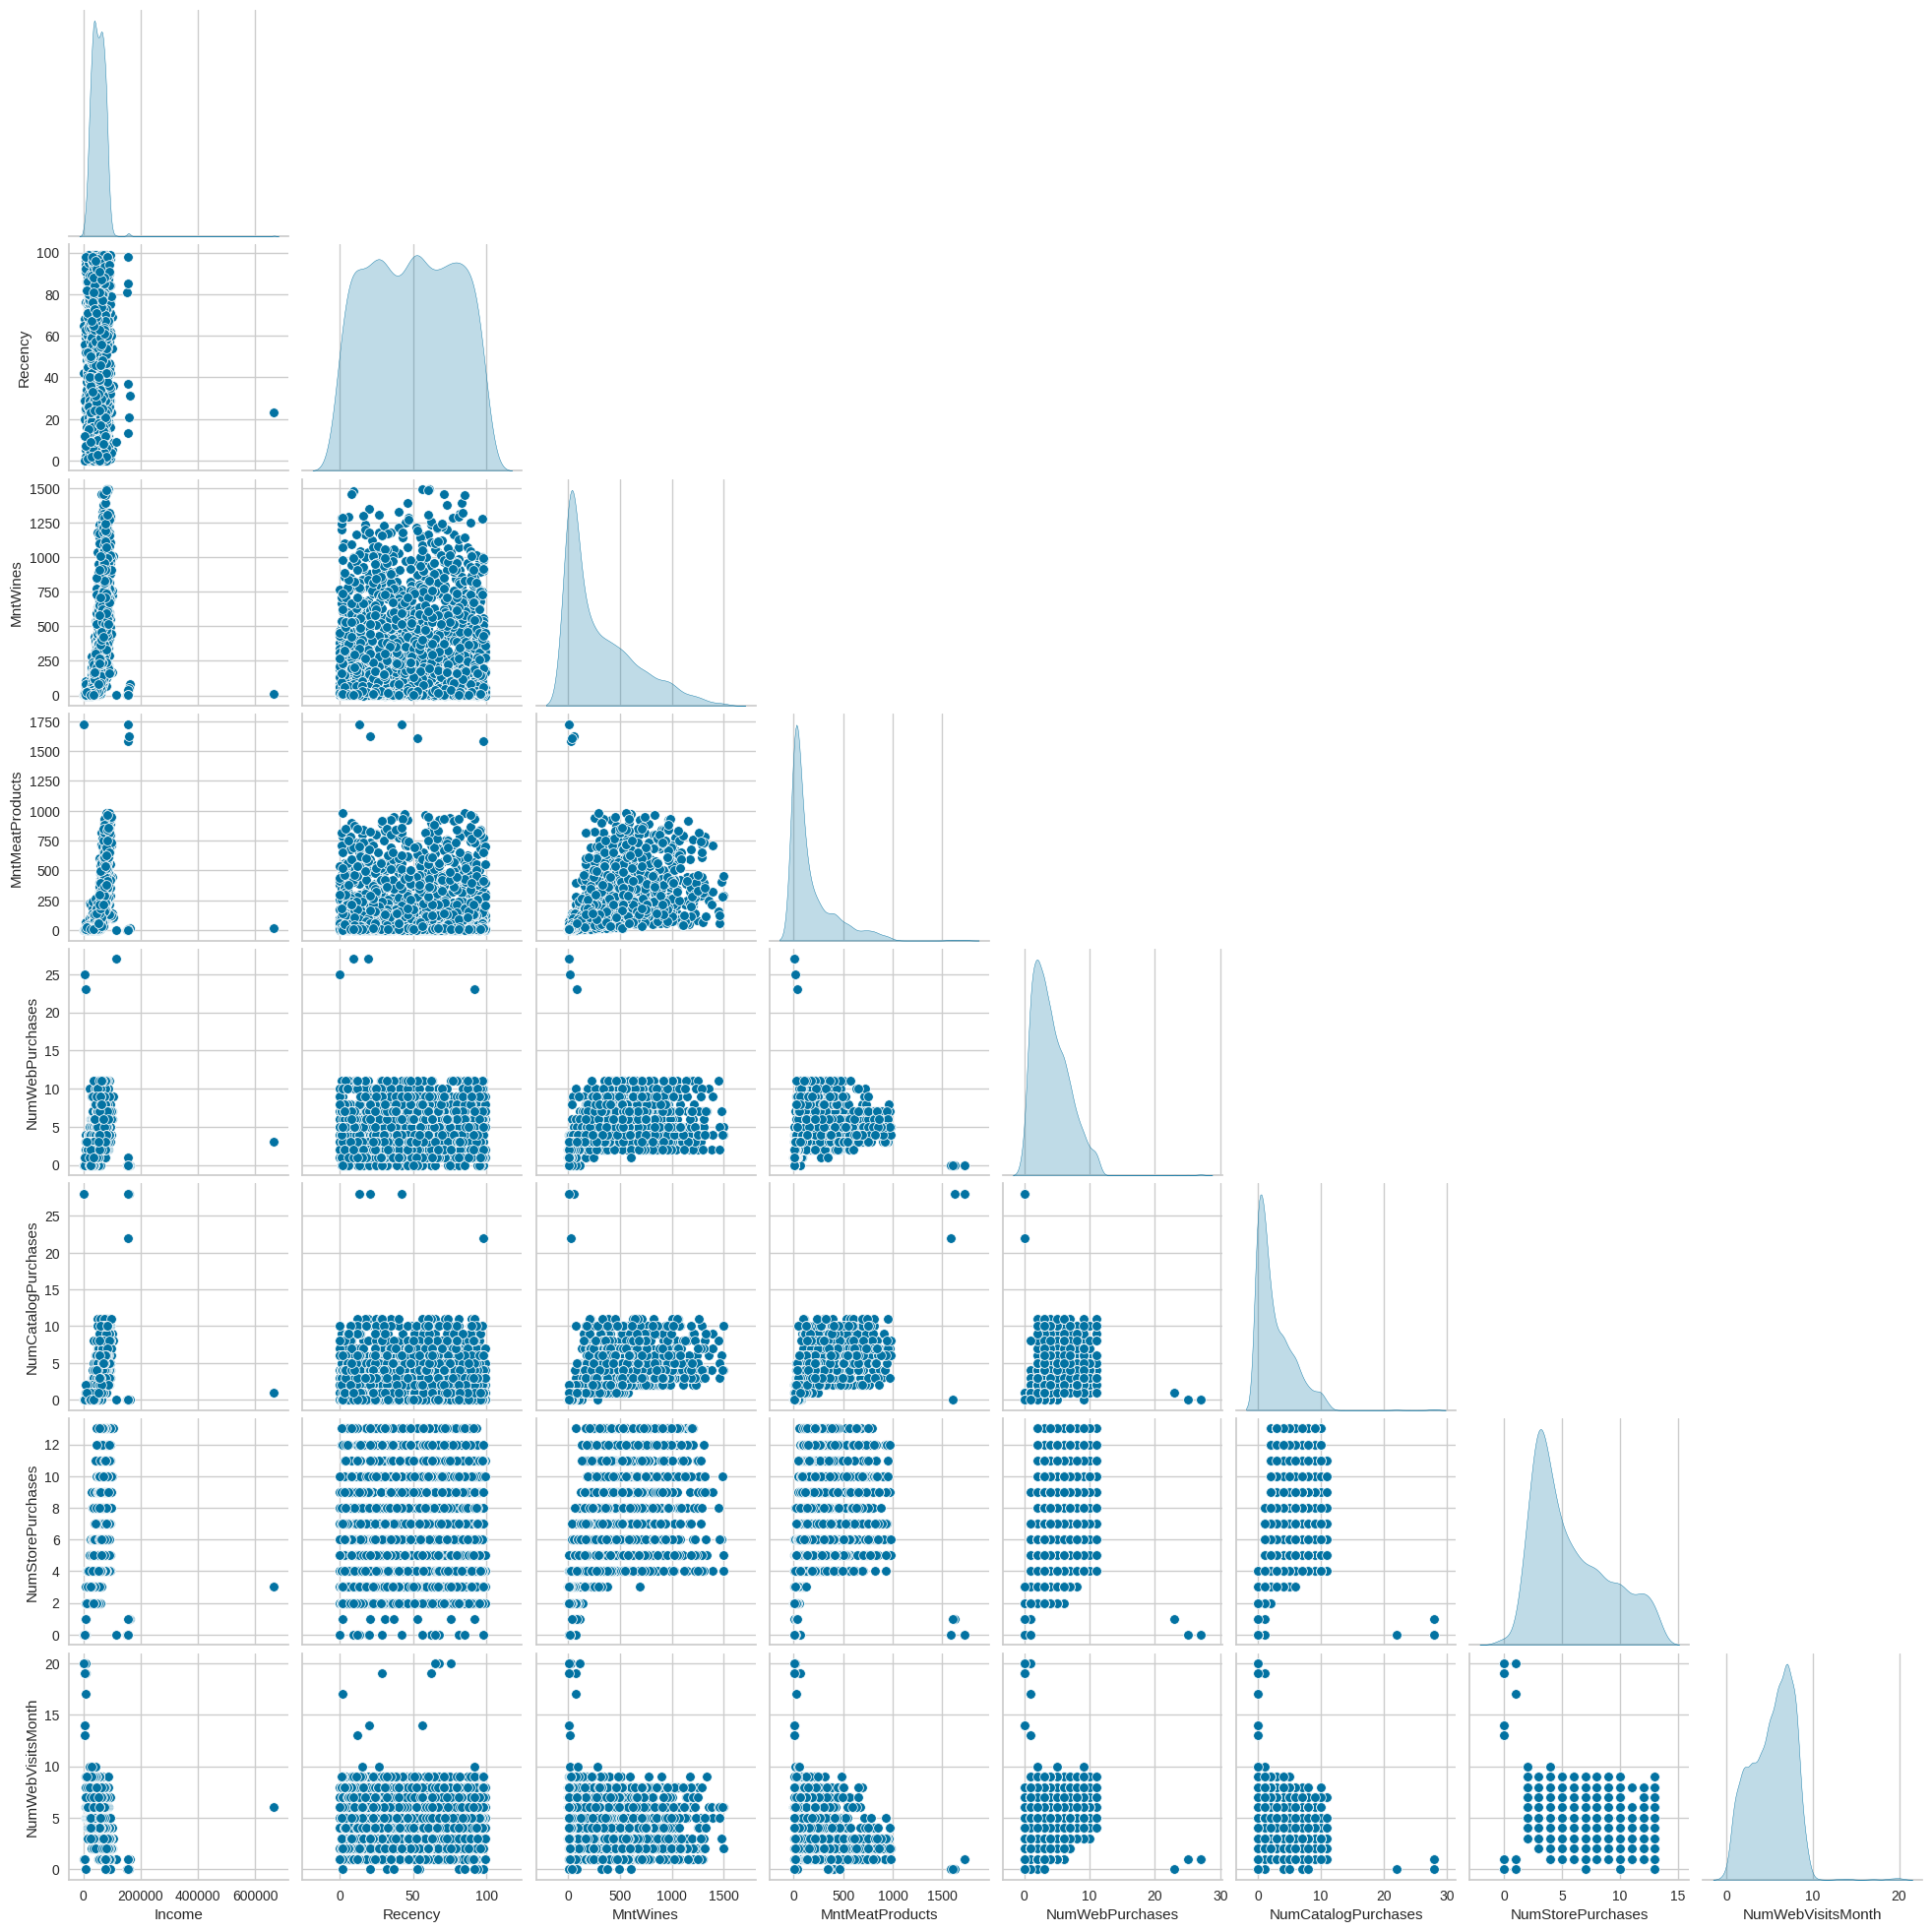

In [14]:
# Write your code here
# Select numeric features for multivariate analysis
numeric_df = data.select_dtypes(include=["number"]).copy()

# Correlation matrix heatmap (upper triangle)
corr = numeric_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14, 8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

# Pairplot on a limited subset to avoid heavy rendering
# Choose a representative subset of variables
subset_cols = [
    col for col in [
        "Income", "Recency", "MntWines", "MntMeatProducts", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"
    ] if col in numeric_df.columns
]

if len(subset_cols) >= 2:
    sns.pairplot(numeric_df[subset_cols], diag_kind="kde", corner=True)
    plt.show()
else:
    print("Not enough numeric columns available for pairplot subset.")

##### **Observations:**

Distributions:
Right-skewed spending and purchase variables; many low values, few high outliers
Income: right-skewed with outliers
Campaign acceptance flags: heavily zero-inflated
Correlations:
Strong positive correlations among spending categories (spend in one tends to correlate with others)
Purchase channels moderately correlate with total spending
Income positively correlates with spending levels
Recency negatively correlates with purchases/spending (recent activity → higher engagement)
Outliers:
Many outliers in monetary and count features
Consider robust scaling/preprocessing before clustering
Key insight: Customers who spend in one category tend to spend across multiple categories, suggesting potential for cross-selling strategies.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

Number of Clusters: 2	WCSS: 42393.20
Number of Clusters: 3	WCSS: 38812.79
Number of Clusters: 4	WCSS: 36258.60
Number of Clusters: 5	WCSS: 34121.31
Number of Clusters: 6	WCSS: 32812.94
Number of Clusters: 7	WCSS: 30702.87
Number of Clusters: 8	WCSS: 30073.16
Number of Clusters: 9	WCSS: 29057.77
Number of Clusters: 10	WCSS: 27783.96


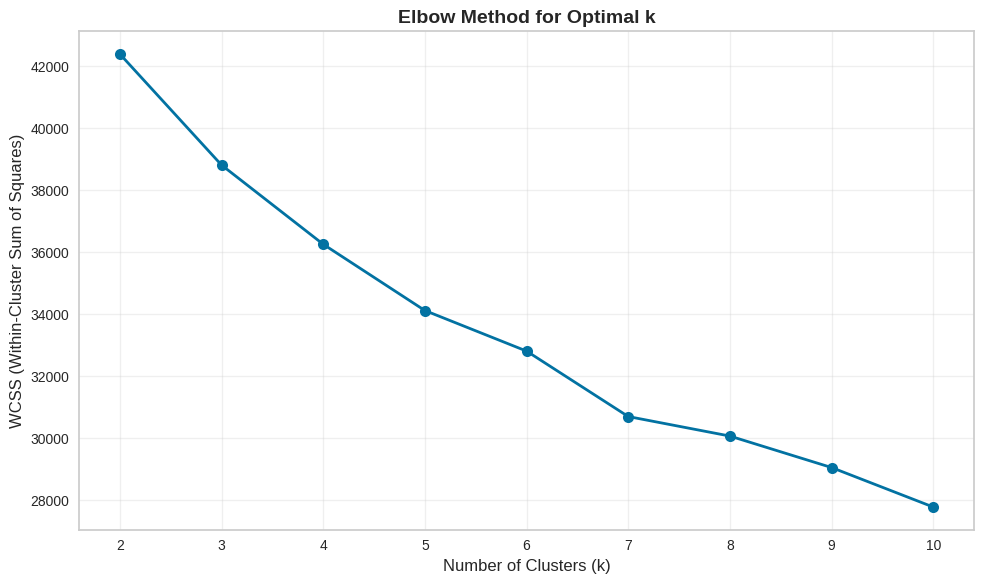

In [16]:
# Write your code here
# Select numeric columns and scale the data for clustering
numeric_data = data.select_dtypes(include=["number"]).copy()

# Impute missing values (median) to handle NaNs before scaling
numeric_data = numeric_data.fillna(numeric_data.median(numeric_only=True))

# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_data.columns)

# Elbow method to find optimal number of clusters
clusters = range(2, 11)
wcss = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1, n_init=10)
    model.fit(data_scaled_df)
    wcss.append(model.inertia_)
    print(f"Number of Clusters: {k}\tWCSS: {wcss[-1]:.2f}")

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(clusters, wcss, "bx-", marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=12)
plt.title("Elbow Method for Optimal k", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Store scaled data for later use
k_means_data = data_scaled_df.copy()

##### **Observations:**

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


k = 2: silhouette score = 0.2532
k = 3: silhouette score = 0.1762
k = 4: silhouette score = 0.1788
k = 5: silhouette score = 0.1874
k = 6: silhouette score = 0.1132
k = 7: silhouette score = 0.1190
k = 8: silhouette score = 0.1070
k = 9: silhouette score = 0.1120
k = 10: silhouette score = 0.1196


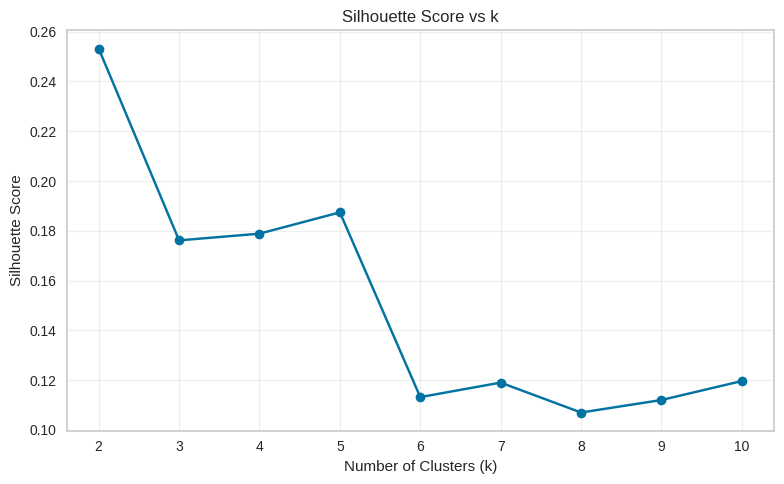


Best k by silhouette score: 2 (score = 0.2532)


In [17]:
# Write your code here
# Silhouette analysis to finalize k
from sklearn.metrics import silhouette_score

# Ensure we use the same scaled data prepared in the elbow step
X = k_means_data.copy()

sil_scores = []
cluster_list = range(2, 11)
best_k = None
best_score = -1.0

for n_clusters in cluster_list:
    model = KMeans(n_clusters=n_clusters, random_state=1, n_init=10)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    if score > best_score:
        best_score = score
        best_k = n_clusters
    print(f"k = {n_clusters}: silhouette score = {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(cluster_list), sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nBest k by silhouette score: {best_k} (score = {best_score:.4f})")

##### **Observations:**

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [18]:
# Write your code here

#Final KMeans fit with timing
import time

# Use best_k from silhouette analysis if available; else choose a reasonable default
final_k = best_k if 'best_k' in globals() or 'best_k' in locals() else 4
print(f"Using k = {final_k} for final model fit")

X = k_means_data.copy()

start = time.perf_counter()
kmeans = KMeans(n_clusters=final_k, random_state=0, n_init=10)
kmeans.fit(X)
elapsed = time.perf_counter() - start

print(f"Fit time: {elapsed:.4f} seconds")

# Store labels for downstream profiling
labels = kmeans.labels_

# Scaled data with labels
k_means_data = X.copy()
k_means_data["K_means_segments"] = labels

# Original data with labels
data1 = data.copy()
data1["K_means_segments"] = labels

Using k = 2 for final model fit
Fit time: 0.0846 seconds


##### **Observations:**

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

In [ ]:
# Write your code here

##### **Observations:**

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

In [ ]:
# Write your code here

##### **Observations:**

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?